<a href="https://colab.research.google.com/github/Aboeleneen/Quora-Question-Pair/blob/master/Quora_Question_pair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd 

In [12]:
root_path = '/content/drive/My Drive/Quora_Question_pair/unzipped_dataset/'

In [42]:
train_data=pd.read_csv(root_path + 'train.csv')

In [ ]:
test_data=pd.read_csv(root_path + 'test.csv')
test_data

## Explore Data


In [ ]:
train_data.info()

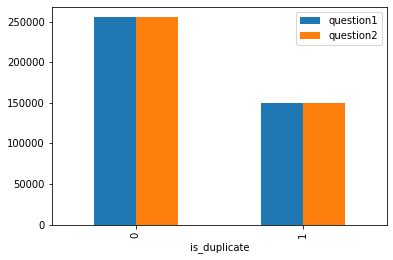

In [75]:
train_data.groupby("is_duplicate").count().plot.bar()

## Data preprocessing


In [44]:
# drop unneccessary columns
train_data.drop(['id','qid1','qid2'] , axis=1 , inplace=True)

In [45]:
# remove the rows were one values is missing
train_data = train_data[~train_data['question1'].isnull()]
train_data = train_data[~train_data['question2'].isnull()]
train_data = train_data[~train_data['is_duplicate'].isnull()]

In [ ]:
# clean the text columns
import nltk #natural language toolkit
from bs4 import BeautifulSoup  #remove html tags
import string 

def remove_html(text):
  soup = BeautifulSoup(text,'lxml')
  text_html_free = soup.get_text()
  return text_html_free

def remove_punctuation(text):
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct

def column_preprocess(text):
  text = remove_html(text)
  text = remove_punctuation(text)
  return text
train_data['question1'] = train_data['question1'].apply(lambda x:column_preprocess(x))
train_data['question2'] = train_data['question2'].apply(lambda x:column_preprocess(x))
train_data

In [ ]:
# Tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
train_data['question1'] = train_data['question1'].apply(lambda x:word_tokenize(x.lower()))
train_data['question2'] = train_data['question2'].apply(lambda x:word_tokenize(x.lower()))
train_data

In [62]:
# remove stopwords
from nltk.corpus import stopwords # i , he , she , ....
#nltk.download('stopwords')
#print(stopwords.words('english'))
def remove_stopwords(text):
  text = [w for w in text if w not in stopwords.words('english')]
  return text 
train_data['question1'] = train_data['question1'].apply(lambda x:remove_stopwords(x))
train_data['question2'] = train_data['question2'].apply(lambda x:remove_stopwords(x))

In [65]:
# Lemmatizing --> maps common words into one base
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
  lem_text = [lemmatizer.lemmatize(i) for i in text]
  return lem_text
train_data['question1'] = train_data['question1'].apply(lambda x:word_lemmatizer(x))
train_data['question2'] = train_data['question2'].apply(lambda x:word_lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [66]:
# create lookup table 
from collections import Counter

## get all unique words
counts = Counter()
train_data['question1'].apply(counts.update);
train_data['question2'].apply(counts.update);

vocab = sorted(counts , key=counts.get , reverse=True)
vocab_to_int = {word : index for index,word in enumerate(vocab,1)}
int_to_vocab={index:word for index,word in enumerate(vocab,1)}

In [68]:
int_to_vocab

{1: 'best',
 2: 'get',
 3: 'india',
 4: 'like',
 5: 'people',
 6: 'good',
 7: 'way',
 8: 'would',
 9: 'one',
 10: 'make',
 11: 'quora',
 12: 'time',
 13: 'life',
 14: 'difference',
 15: 'money',
 16: 'know',
 17: 'year',
 18: 'learn',
 19: 'thing',
 20: 'whats',
 21: 'question',
 22: 'indian',
 23: 'new',
 24: 'much',
 25: 'use',
 26: 'someone',
 27: 'think',
 28: 'many',
 29: 'work',
 30: 'book',
 31: 'u',
 32: 'job',
 33: 'day',
 34: 'movie',
 35: 'trump',
 36: 'find',
 37: 'ever',
 38: 'want',
 39: 'without',
 40: 'start',
 41: 'world',
 42: 'become',
 43: 'online',
 44: 'better',
 45: 'girl',
 46: 'first',
 47: 'mean',
 48: 'note',
 49: 'company',
 50: 'love',
 51: 'dont',
 52: 'english',
 53: 'feel',
 54: 'take',
 55: 'phone',
 56: 'could',
 57: 'account',
 58: 'go',
 59: 'possible',
 60: '2016',
 61: 'number',
 62: 'country',
 63: 'woman',
 64: 'language',
 65: 'person',
 66: 'student',
 67: 'buy',
 68: 'really',
 69: 'weight',
 70: 'engineering',
 71: 'used',
 72: 'need',
 73: '

## Model Arctitecture
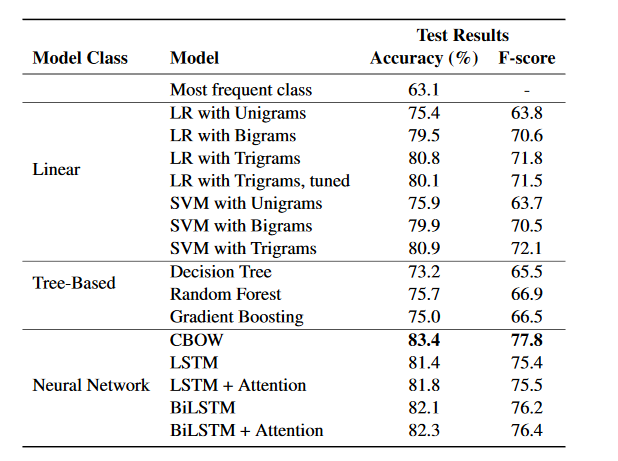

In [ ]:
df = pd.read_csv(file_name, sep="\t or ,")
 
df.drop_duplicates(subset=None, inplace=True)

df.to_csv(file_name_output, index=False)

In [ ]:
%load_ext google.colab.data_table

In [ ]:
df2=pd.read_csv(root_path + 'test_without_dupes.csv')
df2.describe()

In [ ]:
%unload_ext google.colab.data_table